In [48]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.placenta(False)

# desiable the device models
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

models["LA"].u_vol = -0.0025         # 0.0
models["RA"].u_vol = -0.0025         # 0.0
models["LA"].el_min = 1500           # 900
models["RA"].el_min = 1500           # 700
models["LA"].el_max = 2000          # 1500
models["RA"].el_max = 2000          # 1500

models["LV"].u_vol = -0.0025
models["RV"].u_vol = -0.0025
models["LV"].el_min = 800
models["RV"].el_min = 800
models["LV"].el_max = 14000
models["RV"].el_max = 14000

models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.0
models["Ans"].max_baro = 90.0
models["Ans"].g_map_hp = 0.0 # -1.48
models["Ans"].tc_map_hp = 2.0
models["Ans"].heart_rate_ref = 140.0 # 145

# stabilize by calculating 60 seconds
neo.calculate(60)
result = neo.analyze(["LA.vol", "LA.pres", "LV.vol","LV.pres", "Mob.sv_lv", "AA.pres", "LV_AA.flow"], sampleinterval=0.0005, time_to_calculate=30)

# TARGETS 2.51 - 0.78 - 1.73  (LV EDV - LV ESV - SV)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.5 sec. Average model step in 0.0209 ms.

LA.vol          : max    1.85409, min    0.14309 ml/kg
LA.pres         : max   11.65838, min     0.8034 mmHg
LV.vol          : max    2.68263, min    0.72638 ml/kg
LV.pres         : max   75.96881, min   -0.62301 mmHg
Mob.sv_lv       : max    1.90536 min    1.57496
AA.pres         : max   75.52677, min   49.81733 mmHg
LV_AA.flow      : net  238.31199, forward  238.31199, backward        0.0 ml/kg/min, stroke volume:     1.7022 ml/kg, 


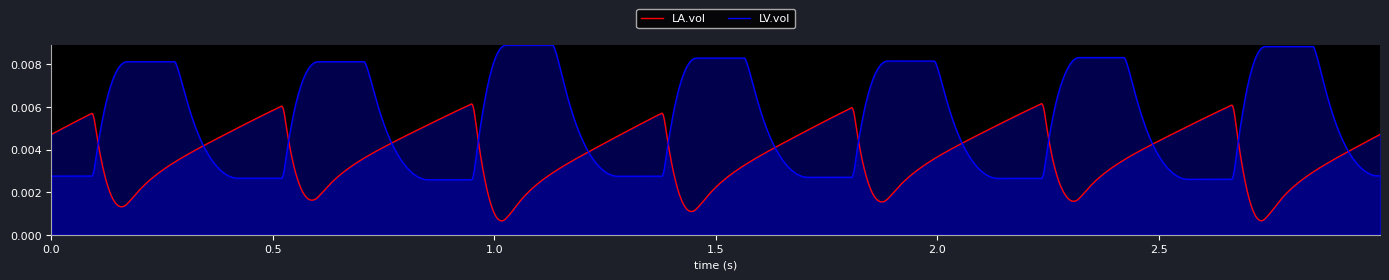


LA.vol          : max     1.8639, min    0.19717 ml/kg
LV.vol          : max    2.69504, min    0.78204 ml/kg


In [45]:
neo.plot_heart_volumes_left(analyze=True, time_to_calculate=3)

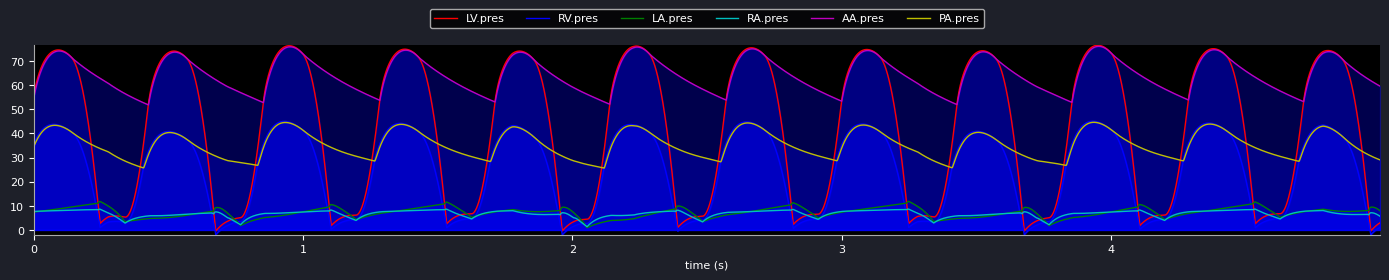


LV.pres         : max   76.50137, min   -0.46358 mmHg
RV.pres         : max   45.03527, min   -1.99353 mmHg
LA.pres         : max   11.82679, min    0.95773 mmHg
RA.pres         : max    8.64067, min    1.31659 mmHg
AA.pres         : max   76.05726, min   51.79988 mmHg
PA.pres         : max   44.58804, min   25.57703 mmHg


In [47]:
neo.plot_heart_pressures(analyze=True, time_to_calculate=5)